Name: A Rahul  
Reg. No.: 20BRS1102

# **Question 1: Dimensionality reduction using auto encoders**

**Import the necessary libraries**

In [1]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

**Import the dataset**

In [2]:
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

**Pre-process and scale the data**

In [3]:
from sklearn.preprocessing import MinMaxScaler

def scale_datasets(x_train, x_test):
  """
  Standard Scale test and train data
  """
  standard_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
  
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [4]:
x_train_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281
...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054


In [5]:
x_test_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.229084,0.513284,0.509804,0.102359,0.102421,0.042994,0.099490,0.421277
1,0.602590,0.182784,0.823529,0.039752,0.047952,0.022590,0.045387,0.213728
2,0.651394,0.131775,0.509804,0.094556,0.078523,0.041509,0.081237,0.365064
3,0.596614,0.136026,0.529412,0.001713,0.002173,0.001289,0.001644,0.388684
4,0.466135,0.402763,0.352941,0.032661,0.037709,0.023739,0.038809,0.168108
...,...,...,...,...,...,...,...,...
2995,0.447211,0.199787,0.431373,0.038171,0.099472,0.035175,0.099655,0.046834
2996,0.618526,0.161530,0.509804,0.138526,0.167753,0.097901,0.170202,0.199356
2997,0.463147,0.399575,0.176471,0.025148,0.031037,0.019339,0.036014,0.123419
2998,0.720120,0.165781,0.764706,0.002478,0.002017,0.001205,0.002138,0.191094


**Define the auto encoder model**

In [6]:
class AutoEncoders(Model):

  def __init__(self, output_units):
    super().__init__()
    self.encoder = Sequential(
        [
          Dense(32, activation="relu"),
          Dense(16, activation="relu"),
          Dense(7, activation="relu")
        ]
    )
    self.decoder = Sequential(
        [
          Dense(16, activation="relu"),
          Dense(32, activation="relu"),
          Dense(output_units, activation="sigmoid")
        ]
    )

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [7]:
auto_encoder = AutoEncoders(len(x_train_scaled.columns))

auto_encoder.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)

history = auto_encoder.fit(
    x_train_scaled, 
    x_train_scaled, 
    epochs=15, 
    batch_size=32, 
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/15
532/532 [==============================] - 3s 3ms/step - loss: 0.0917 - mae: 0.0917 - val_loss: 0.0386 - val_mae: 0.0386
Epoch 2/15
532/532 [==============================] - 2s 3ms/step - loss: 0.0303 - mae: 0.0303 - val_loss: 0.0265 - val_mae: 0.0265
Epoch 3/15
532/532 [==============================] - 1s 3ms/step - loss: 0.0264 - mae: 0.0264 - val_loss: 0.0253 - val_mae: 0.0253
Epoch 4/15
532/532 [==============================] - 2s 3ms/step - loss: 0.0253 - mae: 0.0253 - val_loss: 0.0246 - val_mae: 0.0246
Epoch 5/15
532/532 [==============================] - 1s 3ms/step - loss: 0.0245 - mae: 0.0245 - val_loss: 0.0243 - val_mae: 0.0243
Epoch 6/15
532/532 [==============================] - 2s 4ms/step - loss: 0.0240 - mae: 0.0240 - val_loss: 0.0238 - val_mae: 0.0238
Epoch 7/15
532/532 [==============================] - 2s 4ms/step - loss: 0.0237 - mae: 0.0237 - val_loss: 0.0237 - val_mae: 0.0237
Epoch 8/15
532/532 [==============================] - 2s 4ms/step - loss: 0.

In [8]:
encoder_layer = auto_encoder.get_layer('sequential')
reduced_df = pd.DataFrame(encoder_layer.predict(x_train_scaled))
reduced_df = reduced_df.add_prefix('feature_')

532/532 [==============================] - 1s 2ms/step


In [9]:
reduced_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,2.105646,1.137521,0.0,0.0,0.0,0.572268,0.848073
1,1.801846,1.042766,0.0,0.0,0.0,0.401198,0.821874
2,3.049314,1.863431,0.0,0.0,0.0,1.264294,1.106836
3,2.772270,1.526322,0.0,0.0,0.0,1.069502,1.179332
4,2.742331,1.716082,0.0,0.0,0.0,0.979596,1.107387
...,...,...,...,...,...,...,...
16995,0.465405,2.284097,0.0,0.0,0.0,1.448684,0.567664
16996,0.641371,1.545033,0.0,0.0,0.0,1.631114,0.201220
16997,0.640349,1.057207,0.0,0.0,0.0,1.933246,0.000000
16998,0.625736,1.123039,0.0,0.0,0.0,1.891507,0.000000


**We have successfully reduced the dimensions from 8 columns to 7 columns**. If we want to further reduce the number of dimensions, we need to reduce the number of neurons in the output layer of the encoder.

# **Question 2: Denoising images using an auto encoder**

**Import libraries and dataset**

In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


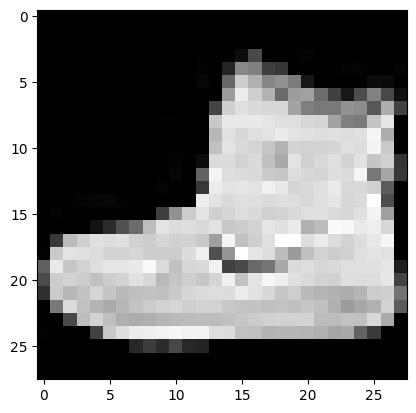

In [12]:
plt.imshow(X_train[0], cmap="gray")

**Perform data visualization**

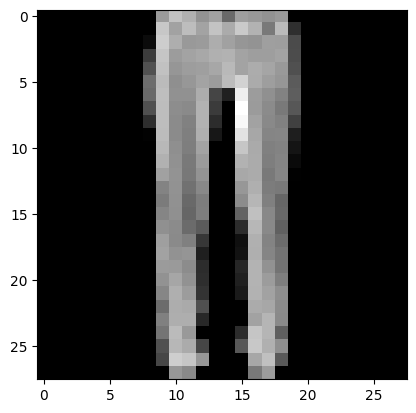

In [13]:
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( X_train[i] , cmap = 'gray') # reshape and plot the image

In [14]:
label = y_train[i]
label

1

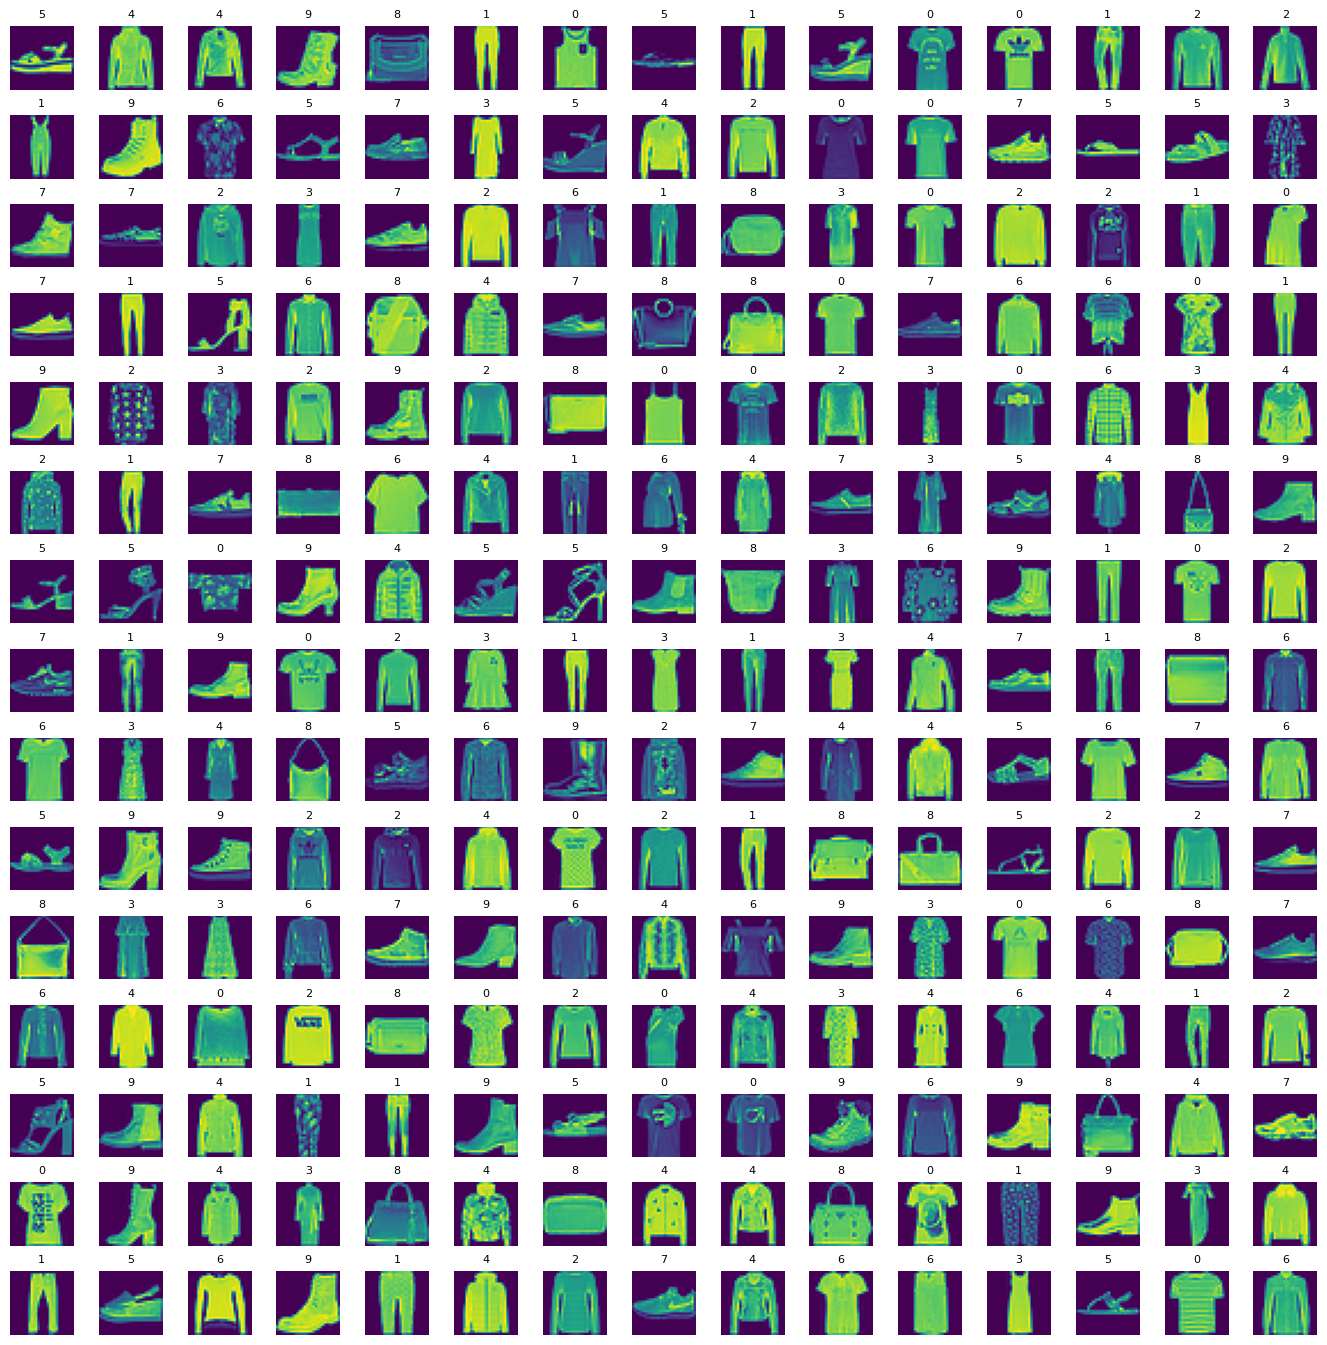

In [15]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

**Perform data preprocessing**

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
noise_factor = 0.1

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

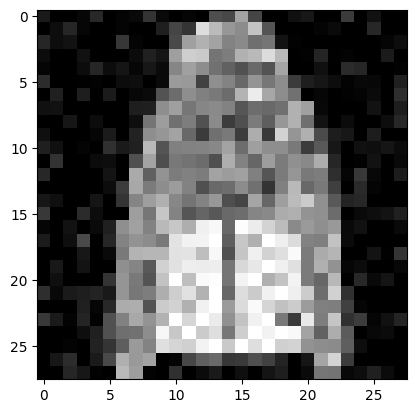

In [18]:
noise_dataset = np.array(noise_dataset)
noise_dataset.shape

plt.imshow(noise_dataset[22], cmap="gray")

In [19]:
noise_test_set = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)
  
noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(10000, 28, 28)

**Build and train the deep learning model**

In [20]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))

In [21]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       1168      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-traina

In [22]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),          
                X_train.reshape(-1, 28, 28, 1), 
                epochs=10, 
                batch_size=200, 
                validation_data=(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 25s 79ms/step - loss: 0.3836 - val_loss: 0.3120
Epoch 2/10
300/300 [==============================] - 25s 85ms/step - loss: 0.3015 - val_loss: 0.2980
Epoch 3/10
300/300 [==============================] - 41s 137ms/step - loss: 0.2920 - val_loss: 0.2911
Epoch 4/10
300/300 [==============================] - 22s 72ms/step - loss: 0.2870 - val_loss: 0.2876
Epoch 5/10
300/300 [==============================] - 24s 79ms/step - loss: 0.2839 - val_loss: 0.2848
Epoch 6/10
300/300 [==============================] - 25s 82ms/step - loss: 0.2816 - val_loss: 0.2829
Epoch 7/10
300/300 [==============================] - 24s 81ms/step - loss: 0.2800 - val_loss: 0.2815
Epoch 8/10
300/300 [==============================] - 27s 89ms/step - loss: 0.2788 - val_loss: 0.2802
Epoch 9/10
300/300 [==============================] - 25s 85ms/step - loss: 0.2776 - val_loss: 0.2794
Epoch 10/10
300/300 [==============================] - 23s 76ms/step - loss: 0.27

**Evaluate the perfomance of the trained model**

In [23]:
evaluation = autoencoder.evaluate(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Accuracy : {:.3f}'.format(evaluation))

313/313 [==============================] - 2s 6ms/step - loss: 0.2787
Test Accuracy : 0.279


In [24]:
predicted = autoencoder.predict(noise_test_set[:10].reshape(-1, 28, 28, 1))
predicted.shape

1/1 [==============================] - 0s 95ms/step


(10, 28, 28, 1)

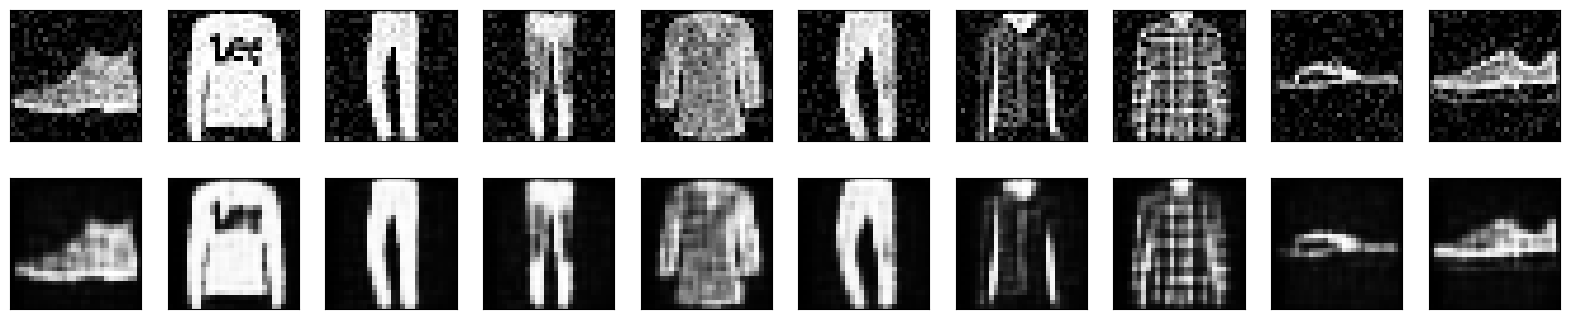

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)